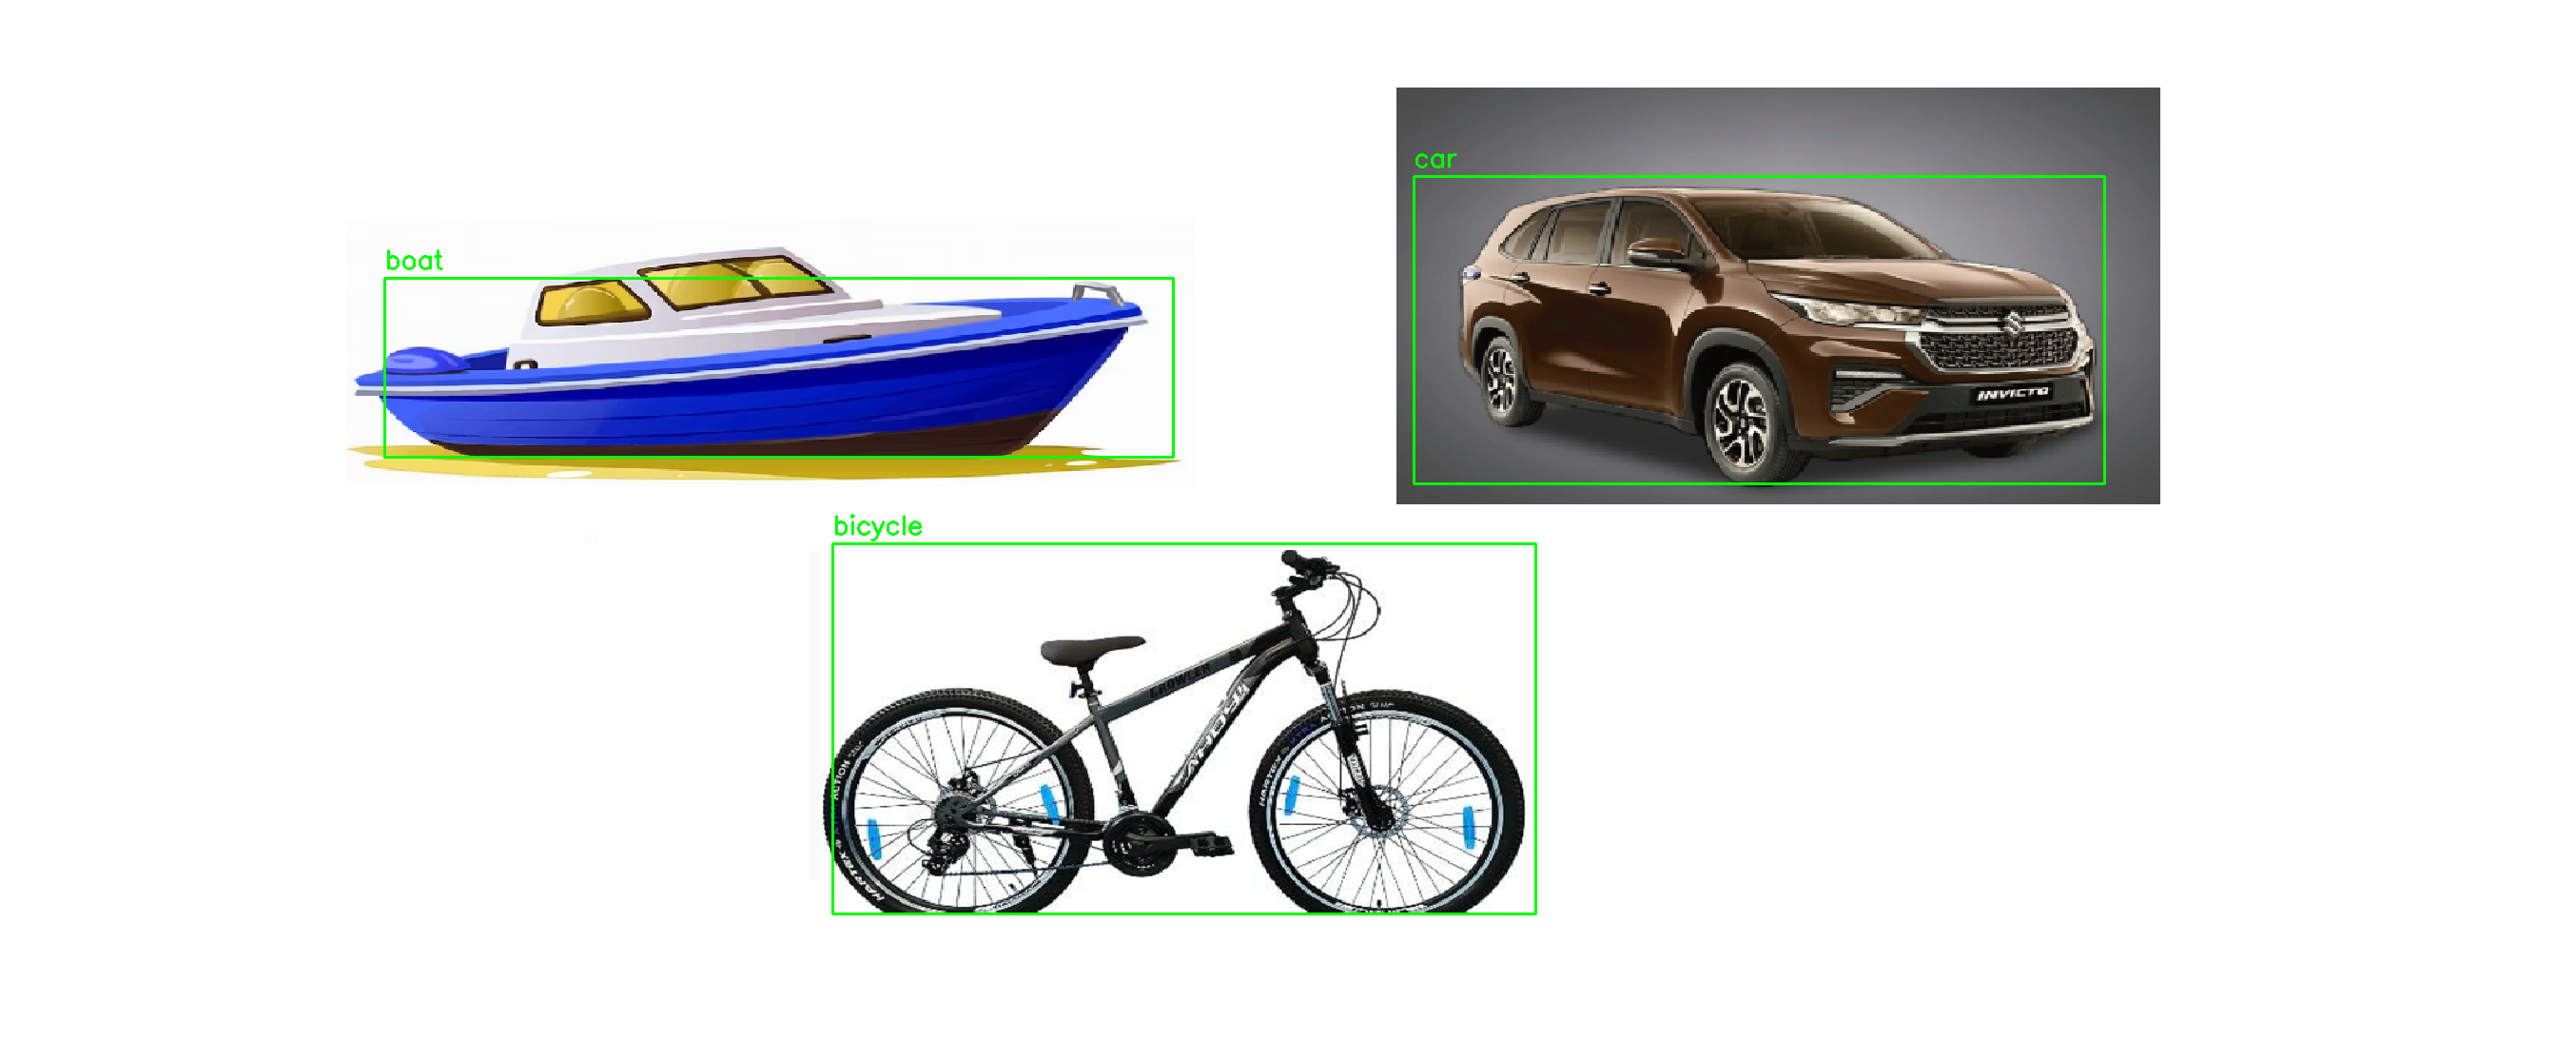

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import tensorflow_hub as hub

# Load the pre-trained SSD MobileNet V3 model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
model = hub.load(model_url)

# Load the label map for COCO dataset
LABELS = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorbike', 5: 'aeroplane',
          6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light'}

# Load the image
image = cv2.imread('/content/Object.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to tensor and add batch dimension (for compatibility with the model)
input_tensor = tf.convert_to_tensor(image_rgb)
input_tensor = input_tensor[tf.newaxis,...]

# Perform detection
# Since the model is loaded from TensorFlow Hub, it returns predictions directly.
detections = model(input_tensor)

# Extract the relevant outputs from the model
boxes = detections['detection_boxes'][0].numpy()  # Box coordinates
class_ids = detections['detection_classes'][0].numpy().astype(int)  # Class indices
scores = detections['detection_scores'][0].numpy()  # Confidence scores

# Set detection threshold for filtering weak detections
threshold = 0.5

# Loop through each detection
for i in range(len(boxes)):
    if scores[i] > threshold:  # Only consider detections above the threshold
        # Extract the coordinates of the bounding box (ymin, xmin, ymax, xmax)
        ymin, xmin, ymax, xmax = boxes[i]

        # Convert from normalized coordinates (0 to 1) to pixel coordinates
        (startX, startY, endX, endY) = (int(xmin * image.shape[1]),
                                        int(ymin * image.shape[0]),
                                        int(xmax * image.shape[1]),
                                        int(ymax * image.shape[0]))

        # Get the label corresponding to the detected class
        label = LABELS.get(class_ids[i], 'Unknown')

        # Draw the bounding box and label on the image
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert the image back to BGR for OpenCV display
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Display the output image
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Display the output image using cv2_imshow (specific to Colab)
cv2_imshow(image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()
